In [1]:
pip install pandas seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
with open("chat.txt", encoding="utf-8") as f:
    lines = f.read().splitlines()

In [4]:
import re
from datetime import datetime

regex_pattern = r"(\d{1,2}\/\d{1,2}\/\d{2},\s\d{2}:\d{2})\s-\s(.+?):\s(.+)"

def parse_msg(line: str) -> dict[str, str]:
    matches = re.search(regex_pattern, line)

    if matches:
        return {
            "date": datetime.strptime(matches.group(1), "%m/%d/%y, %H:%M"),
            "author": matches.group(2),
            "content": matches.group(3)
        }
            
    raise ValueError("Not a message")

def is_msg(line: str) -> bool:
    try:
        parse_msg(line)
    except ValueError:
        return False
    return True

msgs = list(map(parse_msg, filter(is_msg, lines)))

In [5]:
df = pd.DataFrame(msgs)
df = df[df["date"].dt.year == 2023]


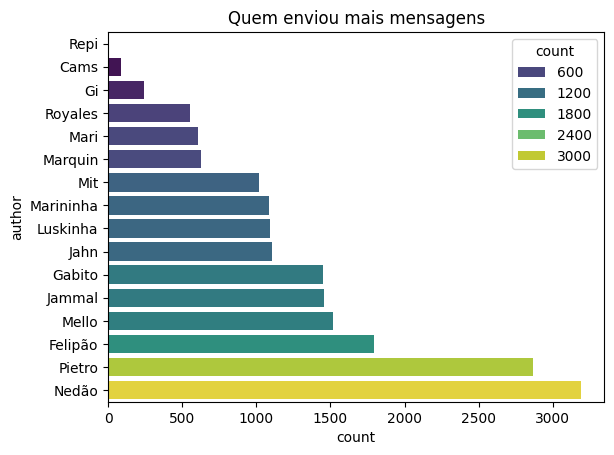

In [65]:
authors = df["author"].value_counts(ascending=True).to_frame()
chart = sns.barplot(data=authors, x="count", y="author", hue="count", palette=sns.color_palette("viridis", as_cmap=True))
chart.set_title("Quem enviou mais mensagens")
plt.show()

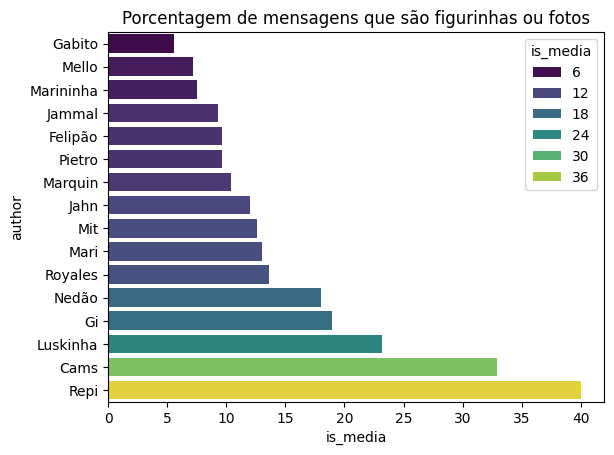

In [196]:
df["is_media"] = df["content"].apply(lambda x: x == "<Media omitted>")
sticker_df = df.groupby("author")["is_media"].mean().to_frame().sort_values(by="is_media") * 100

chart = sns.barplot(data=sticker_df, x="is_media", y="author", hue="is_media", palette=sns.color_palette("viridis", as_cmap=True))
chart.set_title("Porcentagem de mensagens que são figurinhas ou fotos")
plt.show()

Text(0.5, 1.0, 'Mensagens ao longo do ano')

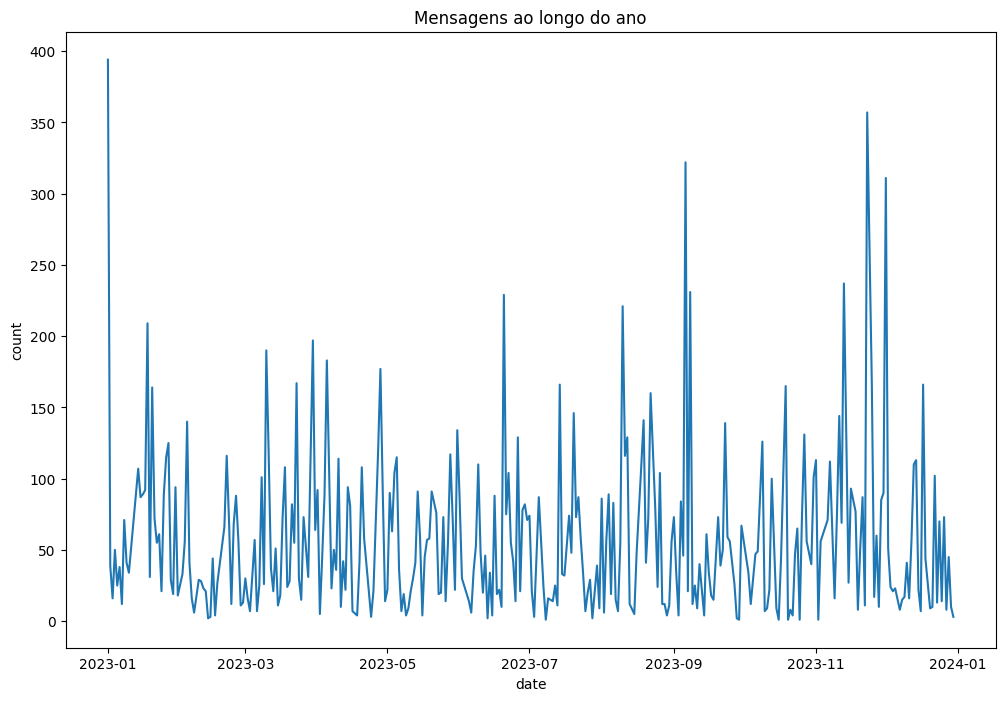

In [242]:
plt.figure(figsize=(12, 8))
chart = sns.lineplot(data=df["date"].dt.date.value_counts(sort=False))
chart.set_title("Mensagens ao longo do ano")

/tmp/ipykernel_53040/2036119200.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(df.groupby("month", observed=False).size(), palette=sns.color_palette("hls", 12))


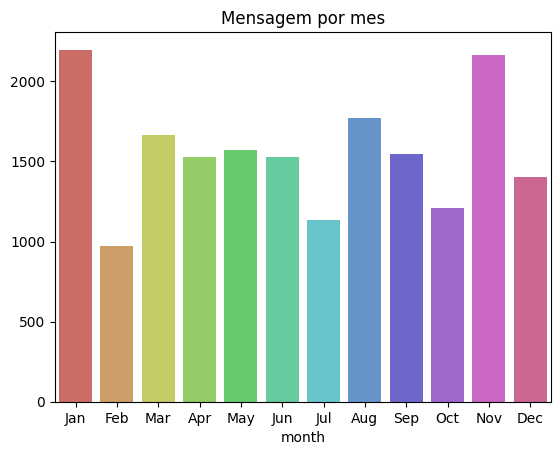

In [197]:
df["month"] = df["date"].dt.month_name().str[:3]
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)
chart = sns.barplot(df.groupby("month", observed=False).size(), palette=sns.color_palette("hls", 12))
chart.set_title("Mensagens por mes")
plt.show()

/tmp/ipykernel_53040/2726348367.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(df.groupby(df["date"].dt.hour).size(), palette=sns.color_palette("hls", 24))


Text(0.5, 1.0, 'Mensagens por hora')

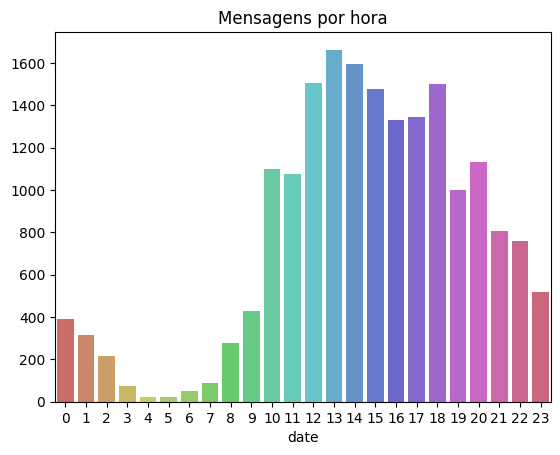

In [243]:
chart = sns.barplot(df.groupby(df["date"].dt.hour).size(), palette=sns.color_palette("hls", 24))
chart.set_title("Mensagens por hora")

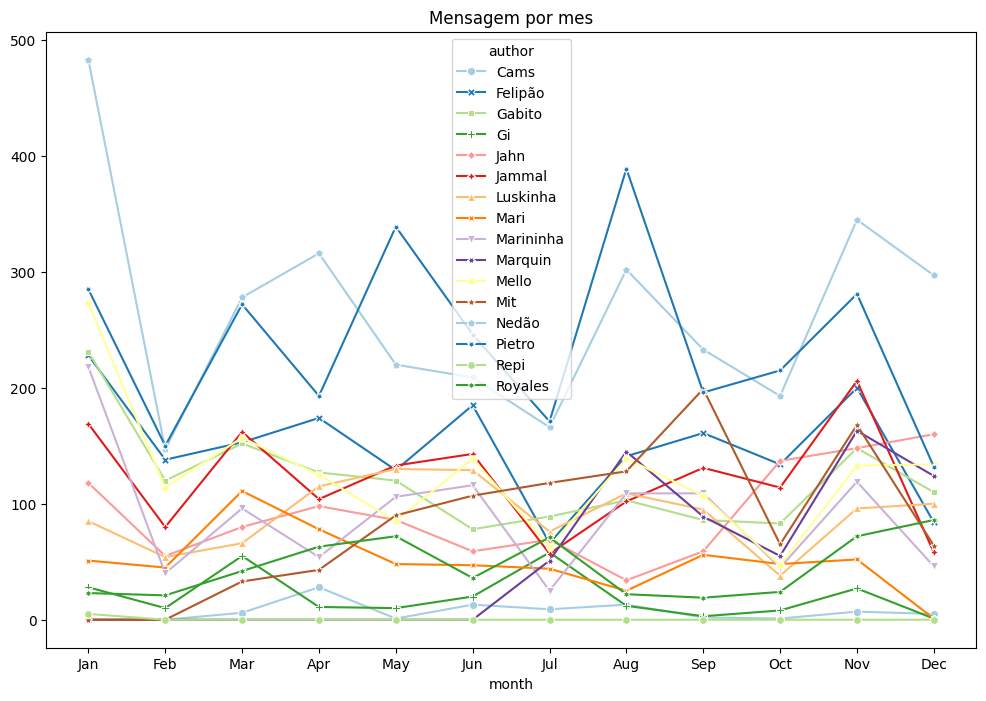

In [245]:
plt.figure(figsize=(12, 8))
chart = sns.lineplot(df.groupby(["month", "author"], observed=False).size().unstack(), dashes=False, markers=True, palette=sns.color_palette("Paired", 16))
chart.set_title("Mensagem por mes")
plt.savefig("mpm.png")


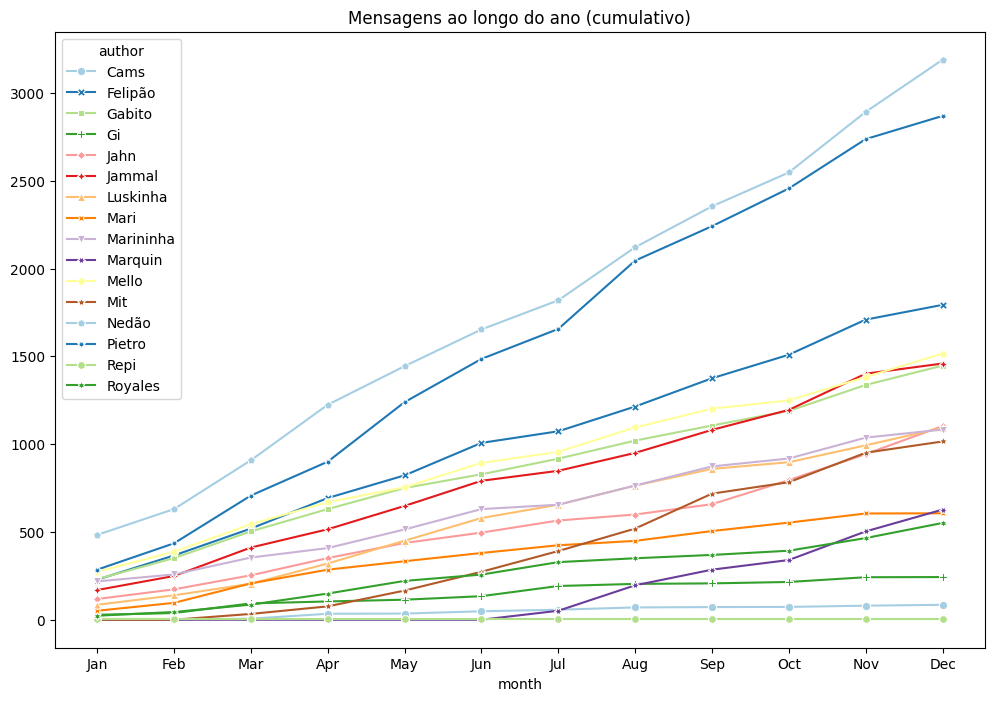

In [247]:
plt.figure(figsize=(12, 8))
chart = sns.lineplot(df.groupby(["month", "author"], observed=False).size().unstack().cumsum(), dashes=False, markers=True, palette=sns.color_palette("Paired", 16))
chart.set_title("Mensagens ao longo do ano (cumulativo)")
plt.savefig("mpmc.png")

In [216]:
pip install emoji

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.5/397.5 KB 1.6 MB/s eta 0:00:000:00:010:00:01:01
Note: you may need to restart the kernel to use updated packages.


In [224]:
import emoji

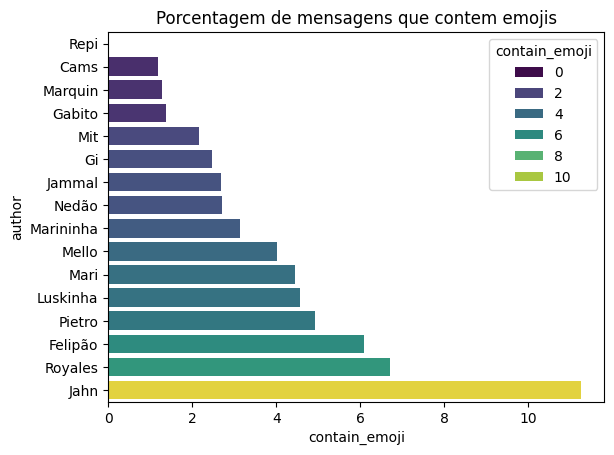

In [226]:
def extract_emojis(s: str) -> bool:
    return [c for c in s if emoji.is_emoji(c)]

df["contain_emoji"] = df["content"].apply(lambda x: bool(extract_emojis(x)))
sticker_df = df.groupby("author")["contain_emoji"].mean().to_frame().sort_values(by="contain_emoji") * 100

chart = sns.barplot(data=sticker_df, x="contain_emoji", y="author", hue="contain_emoji", palette=sns.color_palette("viridis", as_cmap=True))
chart.set_title("Porcentagem de mensagens que contem emojis")
plt.show()

In [241]:
emojis = []
for l in lines:
    emojis.extend(extract_emojis(l))
emojis_df = pd.DataFrame(emojis)
emojis_df.value_counts().head(20)

🥳    231
👏    136
😭    128
🎉    103
🤣     84
🍌     83
🎊     76
🙏     61
🤝     52
👍     51
😡     50
🙌     48
🥰     46
😔     45
📆     40
😂     35
😎     31
🍉     31
🤭     29
🤨     27
Name: count, dtype: int64